In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils as ut
from scipy.sparse.linalg import svds
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#%load_ext autoreload
#%autoreload 2

In [4]:
#movies = pd.read_csv('ml-latest-small/movies.csv')  # movieId title genres
#ratings = pd.read_csv('ml-latest-small/ratings.csv')  # userId movieId rating timestamp
#ratings.drop(['timestamp'], axis=1, inplace=True)  # we don't care about timestap so lets get rid of it

In [5]:
movies = pd.read_csv('ml-latest-small/movies.csv', 
                        usecols=['movieId', 'title'],
                        dtype={'movieId': 'int32', 'title': 'str'})

ratings = pd.read_csv('ml-latest-small/ratings.csv',
                        usecols=['userId', 'movieId', 'rating'],
                        dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [6]:
movie_features = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

In [7]:
movie_features.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Let's split into training & test:
# user_title.shape : 610, 9719 (userId, title)
nUsers = movie_features.shape[0]
np.random.seed(0)
msk = np.random.rand(len(movie_features)) < 0.8

train = movie_features[msk]
test = movie_features[~msk]

## Train Data

In [9]:
#R = movie_features.to_numpy()
#user_ratings_mean = np.mean(R, axis=1)
#R_demeaned = R - user_ratings_mean.reshape(-1,1)
R_train = train.to_numpy()
user_ratings_mean = np.mean(R_train, axis=1)
R_train_demeaned = R_train - user_ratings_mean.reshape(-1,1)

In [10]:
U, sigma, Vt = svds(R_train_demeaned, k=50)
sigma = np.diag(sigma)

In [11]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1,1)
predictions = pd.DataFrame(all_user_predicted_ratings, columns=movie_features.columns)
predictions.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,2.281106,0.185349,1.559224,-0.038141,-0.659306,3.448739,-0.792417,-0.022065,0.310434,0.993159,...,-0.009398,-0.007367,-0.011429,-0.011429,-0.009398,-0.011429,-0.009398,-0.009398,-0.009398,-0.087194
1,-0.070008,0.067726,0.028907,0.040375,0.196387,-0.042836,0.099175,0.033796,0.024777,-0.095285,...,0.020840,0.018219,0.023461,0.023461,0.020840,0.023461,0.020840,0.020840,0.020840,0.037953
2,0.013115,-0.022257,0.039382,0.008511,-0.018635,0.137737,-0.015860,-0.002259,-0.002892,-0.053521,...,0.005364,0.005616,0.005111,0.005111,0.005364,0.005111,0.005364,0.005364,0.005364,0.009082
3,2.655524,-0.278282,0.090814,0.051195,0.322278,0.754663,0.621959,0.035178,0.047556,-0.016075,...,0.012613,0.010467,0.014760,0.014760,0.012613,0.014760,0.012613,0.012613,0.012613,-0.032565
4,1.541302,0.619044,0.003188,0.123470,0.298260,0.551891,0.289413,0.129671,-0.085305,1.045769,...,-0.004290,-0.003735,-0.004846,-0.004846,-0.004290,-0.004846,-0.004290,-0.004290,-0.004290,0.002572


In [12]:
train_pr, train_p = ut.recommend(330, predictions, movies, ratings)

In [13]:
train_pr.head()

,userId,movieId,rating,title
246,330,79702,5.0,Scott Pilgrim vs. the World (2010)
155,330,2324,5.0,Life Is Beautiful (La Vita è bella) (1997)
208,330,4886,5.0,"Monsters, Inc. (2001)"
204,330,4226,5.0,Memento (2000)
202,330,4022,5.0,Cast Away (2000)


In [14]:
train_p.head()

,movieId,title,prediction
6504,59315,Iron Man (2008),1.253279
4200,6539,Pirates of the Caribbean: The Curse of the Bla...,1.195550
6796,68954,Up (2009),1.077894
7521,91529,"Dark Knight Rises, The (2012)",1.007403
6296,54286,"Bourne Ultimatum, The (2007)",0.940604


## Test Data

In [15]:
R_test = test.to_numpy()
user_ratings_mean = np.mean(R_test, axis=1)
R_test_demeaned = R_test - user_ratings_mean.reshape(-1,1)

U, sigma, Vt = svds(R_test_demeaned, k=50)
sigma = np.diag(sigma)

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1,1)
predictions = pd.DataFrame(all_user_predicted_ratings, columns=movie_features.columns)
predictions.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,0.402275,1.442605,0.188819,0.096827,0.507831,0.487892,0.530221,-0.006010,0.112996,1.892620,...,-0.002935,-0.002935,-0.002935,-0.002935,-0.002935,-0.002935,-0.002935,-0.002935,-0.002935,-0.002935
1,0.184182,0.466317,-0.025396,0.027607,-0.063230,0.000764,-0.233454,0.006311,-0.050981,-0.078052,...,0.002470,0.002470,0.002470,0.002470,0.002470,0.002470,0.002470,0.002470,0.002470,0.002470
2,0.690190,1.015535,0.214882,0.099746,0.456095,0.480364,0.629108,-0.033435,0.070266,1.189373,...,0.003041,0.003041,0.003041,0.003041,0.003041,0.003041,0.003041,0.003041,0.003041,0.003041
3,3.494933,3.057740,-0.014498,0.001361,0.062402,4.062465,-0.018738,-0.000499,0.031493,-0.072016,...,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077
4,0.162252,2.952992,0.133084,-0.056724,0.026407,-0.171502,-0.029184,0.969600,-0.002005,-0.073443,...,0.000879,0.000879,0.000879,0.000879,0.000879,0.000879,0.000879,0.000879,0.000879,0.000879


In [16]:
test_pr, test_p = ut.recommend(5, predictions, movies, ratings)

In [17]:
test_pr.head()

,userId,movieId,rating,title
37,5,590,5.0,Dances with Wolves (1990)
30,5,475,5.0,In the Name of the Father (1993)
32,5,527,5.0,Schindler's List (1993)
6,5,58,5.0,"Postman, The (Postino, Il) (1994)"
41,5,596,5.0,Pinocchio (1940)


In [18]:
test_p.head()

,movieId,title,prediction
3596,4995,"Beautiful Mind, A (2001)",5.749762
4093,5952,"Lord of the Rings: The Two Towers, The (2002)",5.489147
1346,1907,Mulan (1998),5.383235
1501,2081,"Little Mermaid, The (1989)",5.344773
39,48,Pocahontas (1995),5.314691


## Applying PCA For Dimensionality Reduction 

We want to standardize our data so that the mean of observed values is 0 and the standard deviation is 1. We will do this using scikit-learn object StandardScalar. 

In [19]:
# converts to a range between 0 and 1
scaler = StandardScaler()
scaled_train = scaler.fit_transform(train)

With our standardized data, we can create a covariance matrix that represents the covariance between each feature in our data.

In [20]:
cov_matrix = np.cov(scaled_train)

We can then take the eigendecomposition of the covariance matrix to get the principal components.

In [21]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

Plotting the explained variance and cumulative explained variance helps us determine how many components to use.

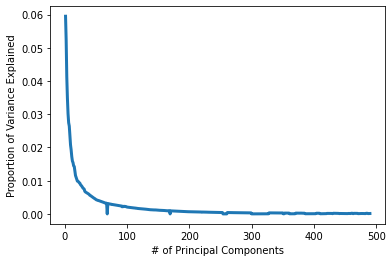

In [22]:
var_explained = []

for i in eigen_values:
    var_explained.append((i/sum(eigen_values)))


plt.plot(range(1,491), var_explained, lw=3)
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('# of Principal Components')

plt.show()

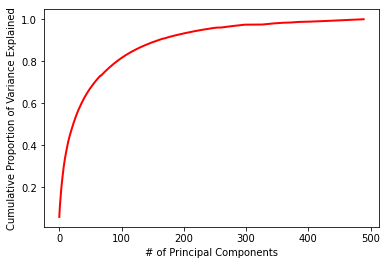

In [23]:
cum_var_explained = np.cumsum(var_explained)

plt.plot(range(490), cum_var_explained, 'r-', lw=2)
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.xlabel('# of Principal Components')

plt.show()

Apply the K components to the original standardized data where K is the number of components chosen. We chose K = 200 because it explains about 90% of the variance in the data set.

## Train

In [24]:
U, sigma, Vt = svds(R_train_demeaned, k=50)
sigma = np.diag(sigma)

In [28]:
W = U.dot(sigma)
X0 = W[:,:200].dot(Vt[:200])

MSE = np.mean( (R_train_demeaned - X0) ** 2 )
print('MSE =', MSE)

X = scaler.inverse_transform(X0)

MSE = 0.08655808


In [27]:
#all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1,1)
predictions = pd.DataFrame(X, columns=movie_features.columns)
predictions.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,5.561625,0.707865,1.802498,-0.011713,-0.435396,5.896108,-0.553913,-0.006943,0.212667,2.038298,...,-0.010796,-0.008979,-0.012705,-0.012705,-0.010796,-0.012705,-0.010796,-0.010796,-0.010796,-0.026382
1,1.200252,0.673402,0.331809,0.031765,0.420798,0.604790,0.342924,0.046750,0.103278,0.568556,...,0.008575,0.006995,0.010273,0.010273,0.008575,0.010273,0.008575,0.008575,0.008575,0.012889
2,1.364623,0.553171,0.344572,0.024170,0.228429,0.888998,0.239905,0.034419,0.088752,0.633142,...,0.006447,0.005560,0.007322,0.007322,0.006447,0.007322,0.006447,0.006447,0.006447,0.008039
3,6.333205,0.108704,0.326383,0.017422,0.473795,1.741588,0.758142,0.022913,0.078130,0.586285,...,-0.003340,-0.003153,-0.003430,-0.003430,-0.003340,-0.003430,-0.003340,-0.003340,-0.003340,-0.011972
4,4.302477,1.420448,0.300715,0.051712,0.508573,1.523289,0.512045,0.079776,0.038319,2.245341,...,0.003866,0.003389,0.004318,0.004318,0.003866,0.004318,0.003866,0.003866,0.003866,0.005657


In [32]:
train_pca_pr, train_pca_p = ut.recommend(330, predictions, movies, ratings)

In [33]:
train_pca_pr.head()

,userId,movieId,rating,title
246,330,79702,5.0,Scott Pilgrim vs. the World (2010)
155,330,2324,5.0,Life Is Beautiful (La Vita è bella) (1997)
208,330,4886,5.0,"Monsters, Inc. (2001)"
204,330,4226,5.0,Memento (2000)
202,330,4022,5.0,Cast Away (2000)


In [34]:
train_pca_p.head()

,movieId,title,prediction
408,527,Schindler's List (1993),3.419260
4200,6539,Pirates of the Caribbean: The Curse of the Bla...,2.807546
707,1036,Die Hard (1988),2.372221
6796,68954,Up (2009),2.359533
6504,59315,Iron Man (2008),2.323858


## Test

In [35]:
U, sigma, Vt = svds(R_test_demeaned, k=50)
sigma = np.diag(sigma)

W = U.dot(sigma)
X0 = W[:,:200].dot(Vt[:200])
X = scaler.inverse_transform(X0)

In [36]:
#all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1,1)
predictions = pd.DataFrame(X, columns=movie_features.columns)
predictions.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,2.101577,2.544838,0.489735,0.044724,0.697076,1.422398,0.730756,0.030347,0.150099,3.493739,...,0.003951,0.003386,0.004515,0.004515,0.003951,0.004515,0.003951,0.003951,0.003951,0.004515
1,1.684002,1.213292,0.272554,0.027586,0.183083,0.666868,0.036492,0.035473,0.058333,0.588524,...,0.005096,0.004368,0.005824,0.005824,0.005096,0.005824,0.005096,0.005096,0.005096,0.005824
2,2.658452,1.961846,0.516933,0.045608,0.650881,1.411382,0.821445,0.020577,0.126207,2.456732,...,0.004976,0.004265,0.005687,0.005687,0.004976,0.005687,0.004976,0.004976,0.004976,0.005687
3,7.734527,4.512351,0.102365,-0.024171,0.136420,6.713688,0.070553,-0.031178,0.004688,0.335993,...,-0.023277,-0.019952,-0.026603,-0.026603,-0.023277,-0.026603,-0.023277,-0.023277,-0.023277,-0.026603
4,1.498953,4.510483,0.359006,-0.012671,0.197250,0.283915,0.155235,0.357550,0.044209,0.486261,...,-0.006834,-0.005858,-0.007810,-0.007810,-0.006834,-0.007810,-0.006834,-0.006834,-0.006834,-0.007810


In [37]:
test_pca_pr, test_pca_p = ut.recommend(5, predictions, movies, ratings)

In [38]:
test_pca_pr.head()

,userId,movieId,rating,title
37,5,590,5.0,Dances with Wolves (1990)
30,5,475,5.0,In the Name of the Father (1993)
32,5,527,5.0,Schindler's List (1993)
6,5,58,5.0,"Postman, The (Postino, Il) (1994)"
41,5,596,5.0,Pinocchio (1940)


In [39]:
test_pca_p.head()

,movieId,title,prediction
4093,5952,"Lord of the Rings: The Two Towers, The (2002)",11.340992
3594,4993,"Lord of the Rings: The Fellowship of the Ring,...",10.971771
3596,4995,"Beautiful Mind, A (2001)",9.772202
3150,4306,Shrek (2001),9.598431
2630,3578,Gladiator (2000),9.385427


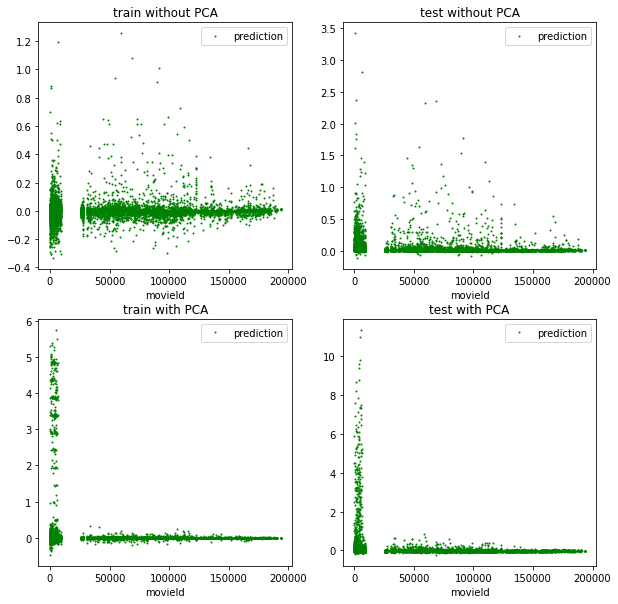

In [40]:
df_list = [train_p, test_p, train_pca_p, test_pca_p]
titles = ['train without PCA', 'test without PCA', 'train with PCA', 'test with PCA']
fig, axs = plt.subplots(2, 2,figsize=(10,10))
index = 0
for i in range(2):
    for j in range(2):
        df_list[index].plot(ax=axs[j,i], x='movieId', y='prediction', style='o', markersize=1, c='g')
        axs[i,j].set_title(titles[index])
        index += 1
#axs[0,0].train_pca_p.plot(x='movieId', y='prediction', style='o', markersize=1)

## PCA Using Varying Components